In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns

In [2]:
production='final.xlsx'
data = pd.read_excel(production)

In [3]:
y = np.array(data['Production'])
X = data.drop(['Indian State','Production','Year'], axis=1)
feature_list=list(X.columns)
#X=np.array(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=20000, epsilon=1)
svr_lin = SVR(kernel='linear', C=500)
svr_poly = SVR(kernel='poly', C=1, degree=10)

In [6]:
svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
svr_poly.fit(X_train,y_train)

SVR(C=1, degree=10, kernel='poly')

In [7]:
y_rbf = svr_rbf.predict(X_test)
y_lin = svr_lin.predict(X_test)
y_poly = svr_poly.predict(X_test)

In [8]:
m=y_test.mean()
y_diff=y_test-y_rbf
d=y_diff.mean()
err1=d/m*100
err1="{:.2f}".format(err1)
print('The error is '+str(err1)+'%.')

The error is 43.65%.


In [9]:
m=y_test.mean()
y_diff=y_test-y_lin
d=y_diff.mean()
err2=d/m*100
err2="{:.2f}".format(err2)
print('The error is '+str(err2)+'%.')

The error is 50.84%.


In [10]:
m=y_test.mean()
y_diff=y_test-y_poly
d=y_diff.mean()
err3=d/m*100
err3="{:.2f}".format(err3)
print('The error is '+str(err3)+'%.')

The error is 33.20%.


Text(0, 0.5, 'Predictions ')

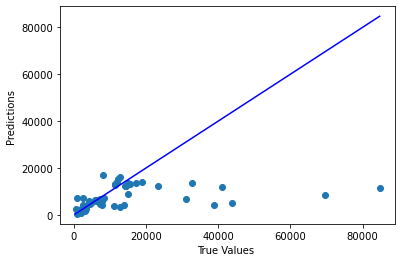

In [11]:
plt.scatter(y_test, y_rbf)
p1 = max(max(y_rbf), max(y_test))
p2 = min(min(y_rbf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

Text(0, 0.5, 'Predictions ')

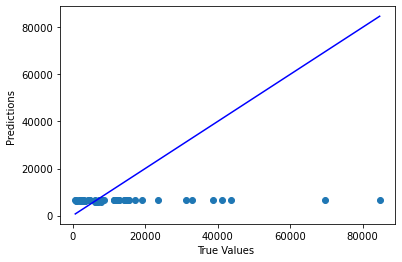

In [12]:
plt.scatter(y_test, y_lin)
p1 = max(max(y_lin), max(y_test))
p2 = min(min(y_lin), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

Text(0, 0.5, 'Predictions ')

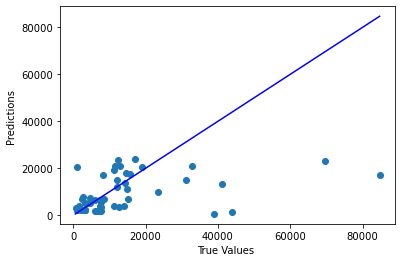

In [13]:
plt.scatter(y_test, y_poly)
p1 = max(max(y_poly), max(y_test))
p2 = min(min(y_poly), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

In [14]:
err1=[err1]
err2=[err2]
err3=[err3]

import csv


df = pd.read_csv("err.csv")
df["RBF"] = err1
df.to_csv("err.csv", index=False)
    
df = pd.read_csv("err.csv")
df["linear"] = err2
df.to_csv("err.csv", index=False)
    
df = pd.read_csv("err.csv")
df["ploy"] =err3
df.to_csv("err.csv", index=False)